In [844]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [845]:
# 為了處理方便，把 'train.csv' 和 'test.csv' 合併起來，'test.csv'的 Weather 欄位用 0 補起來。
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Weather'] = np.zeros((len(df_test),))
df_test['Weather'].fillna(2)

# 以 train_end_idx 作為 'train.csv' 和 'test.csv' 分界列，
train_end_idx = len(df)
df = pd.concat([df, df_test], sort=False)

In [846]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

cardinal = {
            'E':1+0j, 'ENE':0.92388+0.38268j, 'ESE':0.92388-0.38268j,
            'N':0+1j, 'NNE':0.38268+0.92388j, 'NNW':-0.38268+0.92388j,
            'S':0-1j, 'SSE':0.38268-0.92388j, 'SSW':-0.38268-0.92388j,
            'W':-1+0j, 'WNW':-0.92388+0.38268j, 'WSW':-0.92388-0.38268j,
            'SW':-0.7071-0.7071j, 'NE':0.7071+0.7071j, 'NW':-0.7071+0.7071j, 'SE':0.7071-0.7071j
        }

city_coor = pd.read_csv("aus_loc_coor.csv", index_col = "loc")

numeric = df.describe().columns
categorical = [c for c in df.columns if c not in numeric][2:]

labelencoder = LabelEncoder()
tmp = df['Loc'][df['Loc'].notnull()]
labelencoder.fit(tmp)

tmp = df['WindSpeed'][df['WindSpeed'].notnull()]
wind = MinMaxScaler().fit(tmp.values.reshape(-1,1))

In [847]:
def date_encode(date):#date is a string here
    if type(date) == float:
        return date
    # print(type(date))
    y, m, d = date.split("/")
    #print(y,m,d)
    # y = float(y)-2013
    y = 0
    m = float(m)/12
    d = float(d)/365
    #print(y,m,d)

    return m + d
    # t = y+m+d
    # w = 2*(m+d)*np.pi
    # return t + w*(1j)

In [848]:
El_La_code = [  [-1.6, -1.5, -1.3, -1.0, -0.8, -0.6, -0.4, -0.2, -0.2, -0.4, -0.6, -0.7],
                [-0.8, -0.8, -0.6, -0.3, 0.0, 0.3, 0.5, 0.6, 0.7, 1.0, 1.4, 1.6],
                [1.5, 1.2, 0.8, 0.4, -0.2, -0.7, -1.0, -1.3, -1.6, -1.6, -1.6, -1.6],
                [-1.4, -1.2, -0.9, -0.7, -0.6, -0.4, -0.5, -0.6, -0.8, -1.0, -1.1, -1.0],
                [-0.9, -0.7, -0.6, -0.5, -0.3, 0.0, 0.2, 0.4, 0.4, 0.3, 0.1, -0.2],
                [-0.4, -0.4, -0.3, -0.3, -0.4, -0.4, -0.4, -0.3, -0.3, -0.2, -0.2, -0.3],
                [-0.4, -0.5, -0.3, 0.0, 0.2, 0.2, 0.0, 0.1, 0.2, 0.5, 0.6, 0.7],
                [0.5, 0.5, 0.5, 0.7, 0.9, 1.2, 1.5, 1.9, 2.2, 2.4, 2.6, 2.6],
                [2.5, 2.1, 1.6, 0.9, 0.4, -0.1, -0.4, -0.5, -0.6, -0.7, -0.7, -0.6],
                [-0.3, -0.2, 0.1, 0.2, 0.3, 0.3, 0.1, -0.1, -0.4, -0.7, -0.8, -1.0]]
def El_La_encode(date):#date is a string here
    if type(date) == float:
        return date
    # print(type(date))
    y, m, d = date.split("/")
    print(y,m,d)

    return El_La_code[int(y) - 2008][int(m) - 1]

In [849]:
print(df.describe())

# encode Locate
df['Loc'] = df['Loc'].fillna(df['Loc'].mode())
tmp = df['Loc']
city_coor = city_coor.loc[tmp]
city_coor.index = tmp.index
df = pd.concat([df, city_coor], axis = 1)
df = df.drop('Loc', axis = 1)
LE = LabelEncoder()
df['climate'] = LE.fit_transform(df['climate'])

# encode Date
df["ElLa"] = df["Date"].apply(El_La_encode)
df["Date"] = df["Date"].apply(date_encode)

# encode *WindDir as E/N vector
for i in categorical:
    df[i] = df[i].fillna(df[i].mode())
    tmp = df[i].map(cardinal)
    df[i+"_E"] = tmp.apply(lambda r: r.real)
    df[i+"_N"] = tmp.apply(lambda r: r.imag)
df = df.drop(categorical, axis = 1)

df.info()

            TempLow      TempHigh      Steaming           Sun     WindSpeed  \
count  56082.000000  56174.000000  56019.000000  55954.000000  56166.000000   
mean      12.110114     23.741634      5.701668      8.003251     39.366587   
std        6.454455      7.078587      3.214366      2.671015     12.856541   
min       -8.200000     -3.700000      0.000000      0.000000      7.000000   
25%        7.500000     18.500000      4.400000      7.993227     31.000000   
50%       12.000000     23.300000      5.694960      7.993227     39.000000   
75%       16.800000     28.800000      5.694960      9.200000     46.000000   
max       33.900000     47.300000     86.200000     14.500000    135.000000   

       DayWindSpeed  NightWindSpeed   DayHumidity  NightHumidity  \
count  55971.000000    56072.000000  55944.000000   55944.000000   
mean      13.739091       18.424823     51.902205      60.244861   
std        8.720428        8.604804     17.748399      10.720183   
min        0.000

In [850]:
def wind_encode(df, categorical, i, lable):
    tmp = df[lable]
    df[lable] = pd.Series(
        wind.transform(tmp.values.reshape(-1,1)).flatten(),
        index = tmp.index
    )
    df[categorical[i]+"_E"] = df[categorical[i]+"_E"] * df[lable]
    df[categorical[i]+"_N"] = df[categorical[i]+"_N"] * df[lable]
    return df

In [851]:
# combine E/N vector with speed
df = wind_encode(df, categorical, 0, 'WindSpeed')
df = df.drop('WindSpeed', axis = 1)
df = wind_encode(df, categorical, 1, 'DayWindSpeed')
df = df.drop('DayWindSpeed', axis = 1)
df = wind_encode(df, categorical, 2, 'NightWindSpeed')
df = df.drop('NightWindSpeed', axis = 1)

# combine Day/Night temperture: Day - Night -> exp: large
df['DayNightTempDiff'] = df['DayTemp'] - df['NightTemp']
df = df.drop('DayTemp', axis = 1)
df = df.drop('NightTemp', axis = 1)

# combine High/Low temperture: High - Low -> exp: small
df['HighLowTempDiff'] = df['TempHigh'] - df['TempLow']
df = df.drop('TempHigh', axis = 1)
df = df.drop('TempLow', axis = 1)

# keep Steaming -> exp: small

# keep Sun -> exp: small

# keep Day Humidity -> exp: large
# Remove Night Humidity -> exp: X?
# comibine Day/Night Humidity -> exp: large
df['DayNightHumiSum'] = df['NightHumidity'] + df['DayHumidity']
df = df.drop('DayHumidity', axis = 1)
df = df.drop('NightHumidity', axis = 1)

# combine Day/Night Pressure: abs(Day - Night) -> exp: small
# df['DayNightPressAbsDiff'] = abs(df['DayPressure'] - df['NightPressure'])
df = df.drop('DayPressure', axis = 1)
df = df.drop('NightPressure', axis = 1)

# combine Day/Night Cloud: 2 * Day + Night -> exp: large
df['DayNightCloudSum'] = df['DayCloud'] * 2 + df['NightCloud']
df = df.drop('DayCloud', axis = 1)
df = df.drop('NightCloud', axis = 1)

# Remove RISK_MM -> exp: X?
df = df.drop('RISK_MM', axis = 1)

print(df.describe())
print(df.columns)

               Date      Steaming           Sun       Weather      latitude  \
count  55943.000000  56019.000000  55954.000000  70000.000000  70000.000000   
mean       0.576381      5.701668      8.003251      0.052629    -32.350879   
std        0.288934      3.214366      2.671015      0.223292      5.590299   
min        0.086073      0.000000      0.000000      0.000000    -42.879400   
25%        0.326712      4.400000      7.993227      0.000000    -35.117300   
50%        0.565753      5.694960      7.993227      0.000000    -32.987900   
75%        0.826712      5.694960      9.200000      0.000000    -31.953500   
max        1.084932     86.200000     14.500000      1.000000    -12.461100   

          longitude       climate          ElLa     WindDir_E     WindDir_N  \
count  70000.000000  70000.000000  55943.000000  42209.000000  56166.000000   
mean     141.857970      5.988871      0.075023     -0.009805     -0.004313   
std       10.291473      2.277811      0.960486    

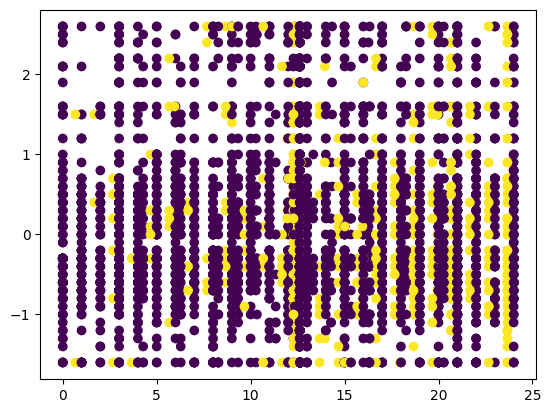

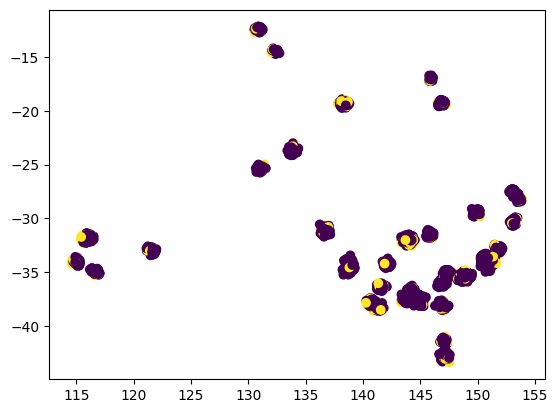

Index(['Date', 'Steaming', 'Sun', 'Weather', 'latitude', 'longitude',
       'climate', 'ElLa', 'WindDir_E', 'WindDir_N', 'DayWindDir_E',
       'DayWindDir_N', 'NightWindDir_E', 'NightWindDir_N', 'DayNightTempDiff',
       'HighLowTempDiff', 'DayNightHumiSum', 'DayNightCloudSum'],
      dtype='object')


In [852]:
upper = 1000
upper = 3000
upper = 10000
# upper = -1
# plt.scatter(df['WindDir_E'].values[:upper] * 3 + df['longitude'].values[:upper],
#             df['WindDir_N'].values[:upper] * 3 + df['latitude'].values[:upper],   
#             c = df['Weather'].values[:upper])
# plt.scatter(df['longitude'].values[:upper], 
#             12 * df['Date'].values[:upper] + 12 * df['Weather'].values[:upper], 
#             c= df['Weather'].values[:upper])
plt.scatter(df['DayNightCloudSum'].values[:upper] - df['Weather'].values[:upper] * 0.33, 
            df['ElLa'].values[:upper] , 
            c= df['Weather'].values[:upper])
plt.show()
plt.scatter(df['WindDir_E'].values[:upper] + df['longitude'].values[:upper],
            df['WindDir_N'].values[:upper] + df['latitude'].values[:upper],   
            c = df['Weather'].values[:upper])
plt.show()

df = df.drop(columns = [col for col in df.columns if df[col].dtype == np.object_])
print(df.columns)

In [853]:
# 將 missing value 補 0
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())
    # print(col)
    # print(df[col].dtype)
        
print(df.head())

       Date  Steaming       Sun  Weather  latitude  longitude  climate  ElLa  \
0  0.635388   5.69496  0.500000      0.0  -35.2835   149.1281        6  -0.4   
1  0.654566   5.69496  5.700000      0.0  -35.2835   149.1281        6  -1.0   
2  0.338813   5.69496  7.993227      0.0  -31.1440   136.8170        4   0.0   
3  0.968721   5.69496  7.993227      1.0  -35.4244   149.0888        6   0.6   
4  0.565753   3.20000  7.993227      0.0  -42.8794   147.3294        6  -0.2   

   WindDir_E  WindDir_N  DayWindDir_E  DayWindDir_N  NightWindDir_E  \
0   0.389762   0.161443      0.173228      0.071752        0.108267   
1   0.148438   0.000000      0.000000      0.000000        0.000000   
2   0.000000  -0.250000      0.000000     -0.187500       -0.055242   
3   0.083711   0.202099     -0.000000      0.000000        0.000000   
4   0.000000   0.484375      0.000000      0.000000        0.000000   

   NightWindDir_N  DayNightTempDiff  HighLowTempDiff  DayNightHumiSum  \
0        0.044845  

# train

In [854]:
from sklearn.model_selection import train_test_split

# X: det_lables, y: sol_lables
banned_col = ['Weather', 'DayWindDir_E', 'DayWindDir_N', 'NightWindDir_E', 'NightWindDir_N', 'latitude', 'longitude']
# banned_col = ['Weather']
X = df.drop(columns = banned_col).values[:train_end_idx, :]
y = df['Weather'].values[:train_end_idx]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)

# print(X_train[0])

test = df.drop(columns = banned_col).values[train_end_idx:, :]

# from imblearn.over_sampling import SMOTE, BorderlineSMOTE
# sm = SMOTE(random_state = 42)
# # sm = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
# X_train, y_train = sm.fit_resample(X_train, y_train)

# from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
# # sm = TomekLinks()
# sm = EditedNearestNeighbours()
# X_train, y_train = sm.fit_resample(X_train, y_train)

In [855]:
CV = 7
n = 35156//CV
LR = 0.01
TREES = 1536
TREE_HEIGHT = 9
LEAVES = int(pow(2, TREE_HEIGHT))-128
L1 = 0.15
L2 = 0.3
SUBSAM = 0.9

In [856]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_score, recall_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import normalize, StandardScaler

# X_train = normalize(X_train)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
test = sc.transform(test)

# train tree model
# model = DecisionTreeClassifier()
# model = GradientBoostingClassifier(max_depth=3, random_state=120)
# model = LogisticRegression(solver='newton-cholesky', max_iter=1000000, random_state=120)
# model = SVC(kernel='linear', C=2, random_state=0, probability=True)
# model = SVC(kernel = "linear", C=3.1663157894736838, cache_size = 5000, class_weight = "balanced")
# model = XGBClassifier()
# model = LGBMClassifier(
#             objective = "binary",
#             is_unbalance = True,
#             learning_rate = LR,
#             n_estimators = TREES,
#             num_leaves = LEAVES,
#             max_depth = TREE_HEIGHT,
#             reg_alpha = L1,
#             reg_lambda = L2,
#             subsample=SUBSAM
#             )
model = LGBMClassifier(
            objective= 'mape',
            boosting= 'gbdt',
            is_unbalance= True,
            learning_rate= 0.01,
            max_depth= 12,
            lambda_l1= 0.1,
            lambda_l2= 0.5,
            bagging_fraction= 0.7,
            bagging_freq= 2,
            min_gain_to_split= 0.01
            )
model.fit(X_train, y_train)


# predict
y_pred_decision = model.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred_decision))
print('Precision: %f' % precision_score(y_test, y_pred_decision))
print('Recall: %f' % recall_score(y_test, y_pred_decision))
print('f1-score: %f' % f1_score(y_test, y_pred_decision))


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Accuracy: 0.886364
Precision: 0.410959
Recall: 0.447761
f1-score: 0.428571


In [857]:
ans_pred = model.predict(test)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')